#**COVID - 19**

#**Face Mask Detection using CNN (Convolutional Neural Network)**

##**Preprocess the Dataset Images**

####Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2,os

data_path='/content/drive/My Drive/Colab Notebooks/Face Mask Detector/dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without mask': 0, 'with mask': 1}
['without mask', 'with mask']
[0, 1]


####Preprocessing

Converting to grayscale image, Resizing image

In [ ]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting into gray scale
            
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, FIXED SIZE for all the images in the dataset
            
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



In [ ]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils


new_target=np_utils.to_categorical(target)

Using TensorFlow backend.


####Saving Preprocessed dataset files

In [ ]:
np.save('data',data)
np.save('target',new_target)

.

.

##**Training Convolutional Neural Network (CNN)**

In [ ]:
target = new_target

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

Initializing the model

In [ ]:
model=Sequential()

Adding Layers

In [ ]:
#CNN layer 1 , Relu and MaxPooling layers
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#CNN layer 2 , Relu and MaxPooling layers
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from CNN layer 2
model.add(Flatten())
model.add(Dropout(0.5))

#Dense layer : 55 neurons
model.add(Dense(55,activation='relu'))

# Output Layer : 2 categories
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Split the dataset into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

Train the model

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 256 samples, validate on 64 samples
Epoch 1/20
256/256 [==============================] - 21s 81ms/step - loss: 0.7186 - accuracy: 0.5352 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/20
256/256 [==============================] - 20s 77ms/step - loss: 0.6872 - accuracy: 0.5430 - val_loss: 0.6796 - val_accuracy: 0.5000
Epoch 3/20
256/256 [==============================] - 20s 76ms/step - loss: 0.6634 - accuracy: 0.6055 - val_loss: 0.6903 - val_accuracy: 0.5156
Epoch 4/20
256/256 [==============================] - 20s 78ms/step - loss: 0.6285 - accuracy: 0.5977 - val_loss: 0.5544 - val_accuracy: 0.7812
Epoch 5/20
256/256 [==============================] - 20s 78ms/step - loss: 0.4922 - accuracy: 0.7852 - val_loss: 0.5212 - val_accuracy: 0.7188
Epoch 6/20
256/256 [==============================] - 20s 79ms/step - loss: 0.3884 - accuracy: 0.8281 - val_loss: 0.3688 - val_accuracy: 0.8594
Epoch 7/20
256/256 [==============================] - 20s 79ms/step - loss: 0.3551 - accura

Visualizing Model Performance

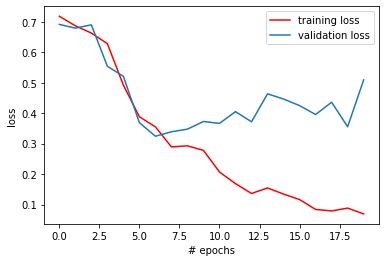

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

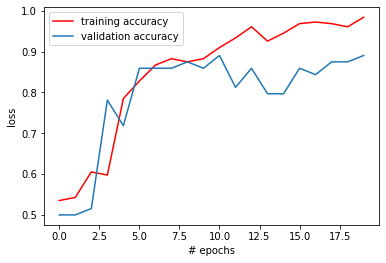

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

36/36 [==============================] - 1s 20ms/step
[0.2261280363632573, 0.8888888955116272]


.

**Test Loss** : 0.2261280363632573

**Test Accuracy** : 0.8888888955116272

.
